<a href="https://colab.research.google.com/github/ppprakharr/RegressionModels/blob/main/MedicalInsuraceCost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [95]:
# loading the data as dataframe
medical_data = pd.read_csv('/content/insurance.csv')

In [96]:
# checking first5 elements
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [97]:
#checking lasst 5 elements
medical_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [98]:
#checking for null values
medical_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [99]:
# checking the datapoints
medical_data.shape

(1338, 7)

In [100]:
# checking the values
medical_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [101]:
# checking children
medical_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Stastistical measure of data

In [103]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [104]:
# creating a correlation metrics
correlation = medical_data.corr()

<ipython-input-104-4ee307fcb9fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = medical_data.corr()


<Axes: >

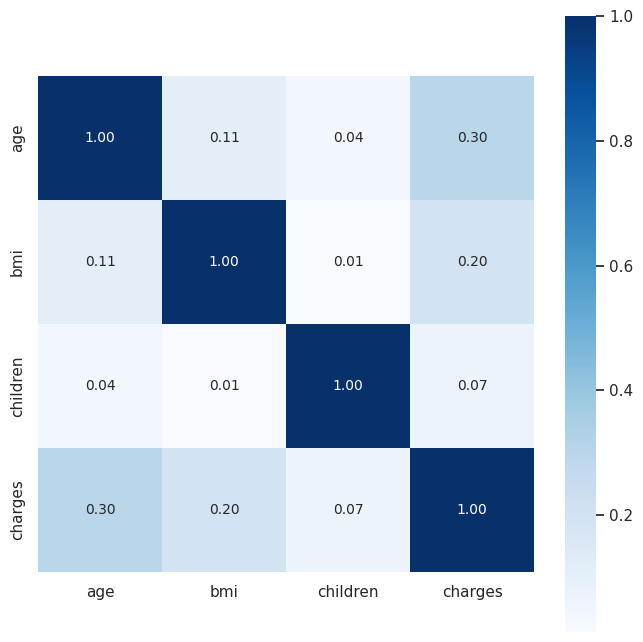

In [105]:
#plotting the correleation map
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,annot=True, annot_kws={'size': 10},cmap='Blues',fmt='0.2f')

<ipython-input-107-c87dcaad389b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_data['age'])


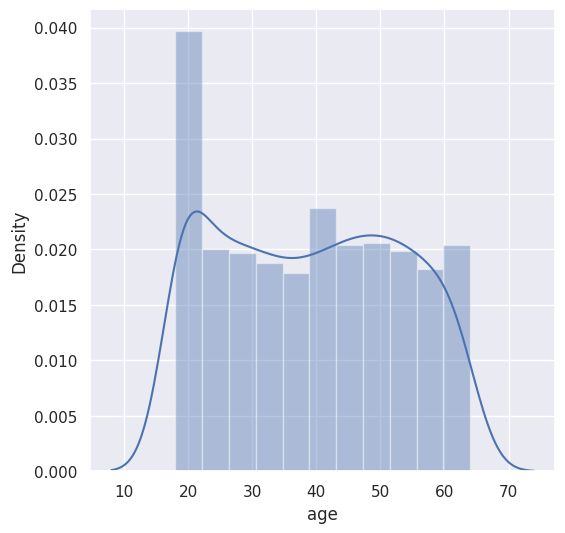

In [107]:
# plotting distmap

plt.figure(figsize=(6,6))
sns.distplot(medical_data['age'])
# plt.title("Age1 visualise")
plt.show()

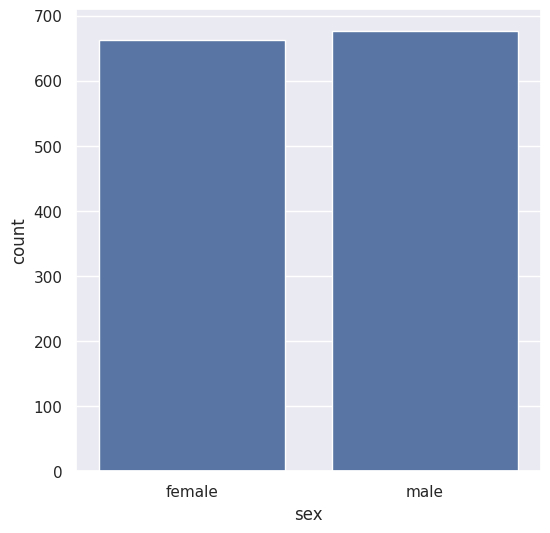

In [108]:
# creating count map based on gender
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=medical_data)
# plt.title('Sex ratio')
plt.show()

<ipython-input-109-3c824a807502>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_data['bmi'])


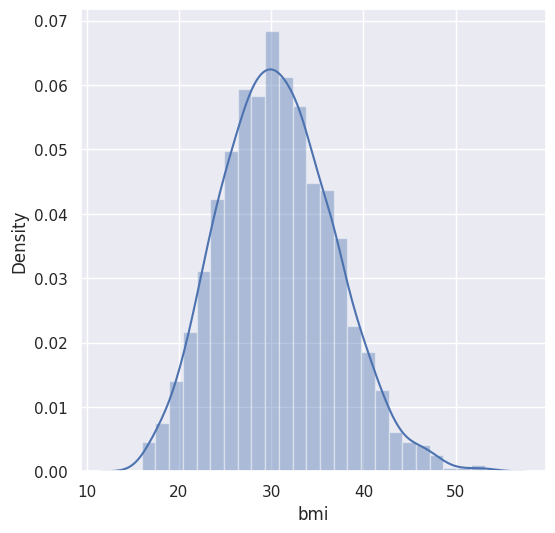

In [109]:
#BMI distribution
plt.figure(figsize=(6,6))
sns.distplot(medical_data['bmi'])
# plt.title('Bmi visualise')
plt.show()

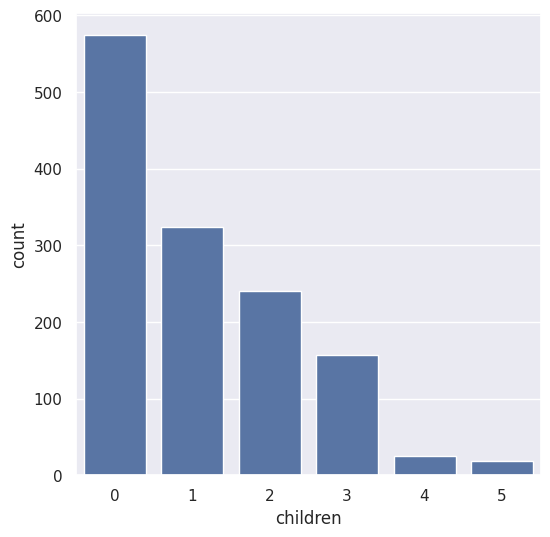

In [110]:
# children countplot
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=medical_data)
# plt.title('children')
plt.show()

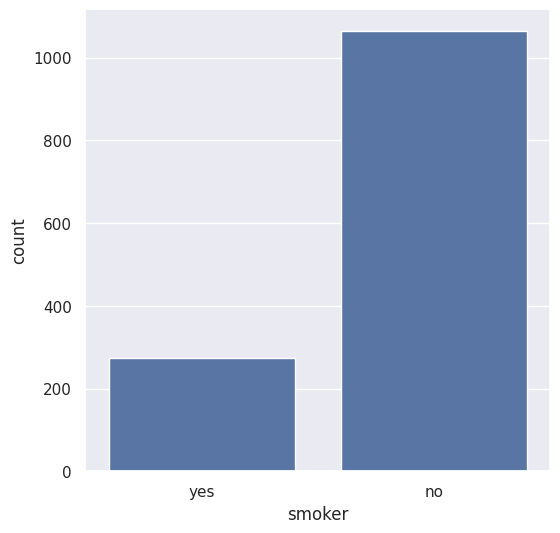

In [111]:
# smoker countplot
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=medical_data)
# plt.title('smoker')
plt.show()

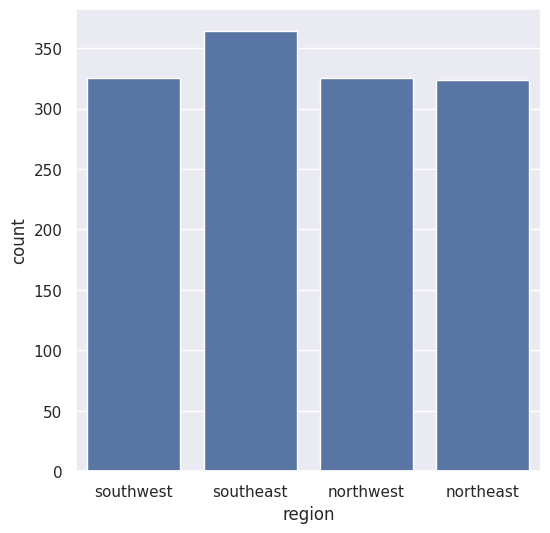

In [112]:
# region countplot
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=medical_data)
# plt.title('region')
plt.show()

<ipython-input-113-9d1d4b5846a4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical_data['charges'])


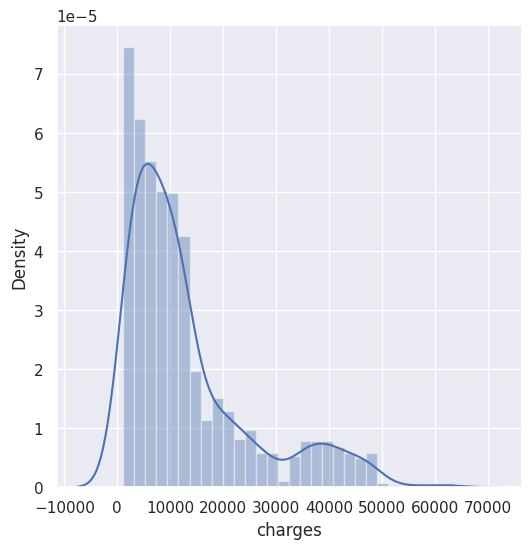

In [113]:
# check the charges data
plt.figure(figsize=(6,6))
sns.distplot(medical_data['charges'])
# plt.title('Charges visualise')
plt.show()

Changing the objects to numerical data

In [114]:
medical_data.replace({'region': {'southwest':0,'southeast':1,'northwest':2,'northeast':3}, 'sex':{'female':0,'male':1}, 'smoker':{'yes':0, 'no':1}},inplace=True)

In [115]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


<Axes: >

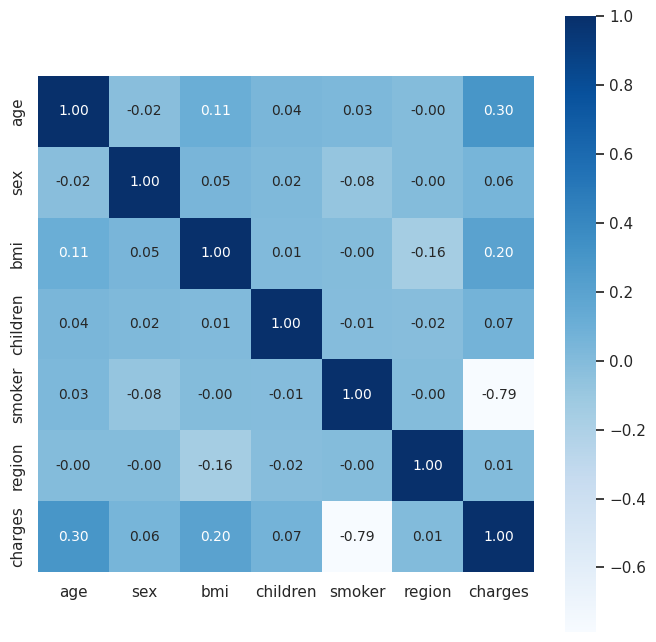

In [116]:
# plotting the heatmap post converting to binary
correlation = medical_data.corr()
#plotting the correleation map
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,annot=True, annot_kws={'size': 10},cmap='Blues',fmt='0.2f')

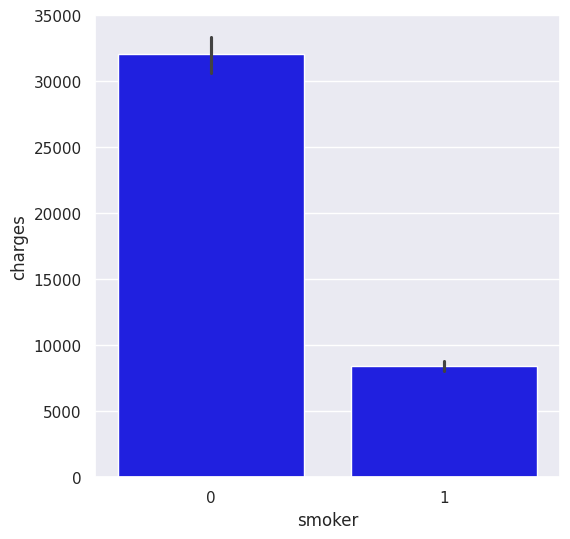

In [117]:
# checking smoker relation with charges
plt.figure(figsize=(6,6))
sns.barplot(medical_data,x=medical_data['smoker'], y=medical_data['charges'],color='Blue')
plt.xlabel='smoker'
plt.ylabel='charges'
plt.title='smoke_vs_charges'
plt.show()

Splitting the Data and label

In [118]:
x=medical_data.drop(columns='charges',axis=1)
y=medical_data['charges']
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       0       0
1      18    1  33.770         1       1       1
2      28    1  33.000         3       1       1
3      33    1  22.705         0       1       2
4      32    1  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       1       2
1334   18    0  31.920         0       1       3
1335   18    0  36.850         0       1       1
1336   21    0  25.800         0       1       0
1337   61    0  29.070         0       0       2

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into training and test

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

Training the model

Linear Regression

In [120]:
l_model = LinearRegression()

In [121]:
# training the model
l_model.fit(x_train, y_train)

LinearRegression()

In [122]:
#evaluating the model
train_data = l_model.predict(x_train)
prediction = metrics.r2_score(y_train,train_data)
print("r_square value: ",prediction)


r_square value:  0.7539643636734955


In [123]:
# evaluating the test data
test_data = l_model.predict(x_test)
prediction = metrics.r2_score(y_test,test_data)
print("r_square value: ",prediction)

r_square value:  0.7032434167136936


Training the Model

XGBRegressor

In [124]:
x_model = XGBRegressor()

In [125]:
# training the model
x_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [126]:
#evaluating the training data
train_data = x_model.predict(x_train)
prediction = metrics.r2_score(y_train,train_data)
print("r_square value: ",prediction)

r_square value:  0.995203546412993


In [127]:
# evaluating the test data
test_data = x_model.predict(x_test)
prediction = metrics.r2_score(y_test,test_data)
print("r_square value: ",prediction)

r_square value:  0.6955901602572361


Building a predective system

In [128]:
input_data=(31,0,25.74,0,1,1)
input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
price=x_model.predict(input_data_reshaped)
price2 = l_model.predict(input_data_reshaped)
print(price)
print(price2)

[3312.4116]
[4078.35738401]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
